In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

### Function eqs3_rhs describes a model in Eqs.14 with a weak distributed delay kernel ($n=1$). Note that in this case, the DDDE system Eqs.14 is mathematically equivalent to the ODEs in Eqs. 12. For that reason we choose to integrate numerically Eqs. 12 rather than the DDDE system in Eqs.14

In [2]:
def eqs3_rhs(x, t, kon, kof, alpha, gamma):
    a0, a1, a2, m, c = x
    alpham, alphap = alpha
    gm, gp = gamma
    k01, k12, k23 = kon
    k10, k21, k32 = kof
    return np.array([
        -k01*a0*c + k10*a1,
        -k12*a1*c + k21*a2 + k01*a0*c - k10*a1,
        -k23*a2*c + k32*(1. - a0 - a1 - a2) + k12*a1*c - k21*a2,
        alpham*a0 - gm*m, 
        alphap*m - gp*c])

# Initial condiations
x0 = np.array([1., 0., 0., 0., 0.])
ti = 0

tf = 100 #Time
n_points = 100000 # Number of points to use in plots
t = np.linspace(ti, tf, n_points)

#setting parameters values
p = 0.246
q = 30.
e = 10.
alpha = [33., 4.5]
gamma = [0.23, 4.6]

# Solving 
konR = [3*p,2*p*e,p*e*e] # RM parameters
kofR = [q, 2*q, 3*q]     # RM parameters
konS = [3*p, 2*p, p]     # SM parameters
kofS = [q, 2*q/e, 3*q/(e*e)]  # SM parameters

xR = scipy.integrate.odeint(eqs3_rhs, x0, t, args=(konR, kofR, alpha, gamma))
xS = scipy.integrate.odeint(eqs3_rhs, x0, t, args=(konS, kofS, alpha, gamma))

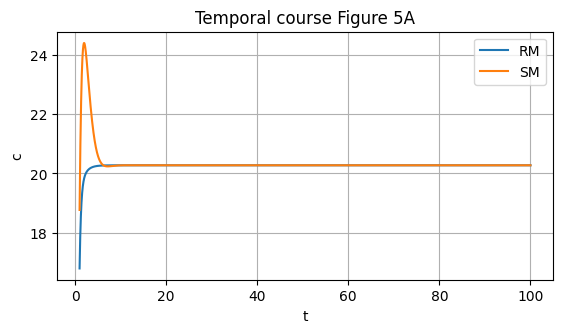

In [3]:
#Plotting
figure, axis = plt.subplots(1,sharex="col", sharey="row") 
axis.plot(t[1000:], xR[1000:,4],label='RM')
axis.plot(t[1000:], xS[1000:,4],label='SM') 
axis.set_title("Temporal course Figure 5A")  
axis.set_xlabel('t')
axis.set_ylabel('c')
axis.set_box_aspect(1/2)
axis.legend(loc='upper right')
axis.grid()
plt.show() 


### Function eqs4_rhs above describes a model in Eqs.14 with a strong distributed delay kernel ($n=2$). Note that in this case, we choose to integrate numerically an equivalent ODE system.

In [4]:
def eqs4_rhs(x, t, kon, kof, alpha, gamma):
    a0, a1, a2, m, ct, c = x
    alpham, alphap = alpha
    gm, gp = gamma
    k01, k12, k23 = kon
    k10, k21, k32 = kof
    return np.array([
        -k01*a0*c + k10*a1,
        -k12*a1*c + k21*a2 + k01*a0*c - k10*a1,
        -k23*a2*c + k32*(1. - a0 - a1 - a2) + k12*a1*c - k21*a2,
         (alpham*alphap/gp)*a0 - gm*m, # this m denote m' of equation
         gp*m - gp*ct,
         gp*ct - gp*c])

# Initial condiations
x0 = np.array([1., 0., 0., 0., 0., 0.])
ti = 0

tf = 100 #Time
n_points = 100000 # Number of points to use in plots
t = np.linspace(ti, tf, n_points)

#setting parameters values
p = 0.246
q = 30.
e = 10.
alpha = [33., 4.5]
gamma = [0.23, 4.6]

# Solving 
konR = [3*p,2*p*e,p*e*e] # RM parameters
kofR = [q, 2*q, 3*q]     # RM parameters
konS = [3*p, 2*p, p]     # SM parameters
kofS = [q, 2*q/e, 3*q/(e*e)]  # SM parameters

# Solving 
xR = scipy.integrate.odeint(eqs4_rhs, x0, t, args=(konR, kofR, alpha, gamma))
xS = scipy.integrate.odeint(eqs4_rhs, x0, t, args=(konS, kofS, alpha, gamma))

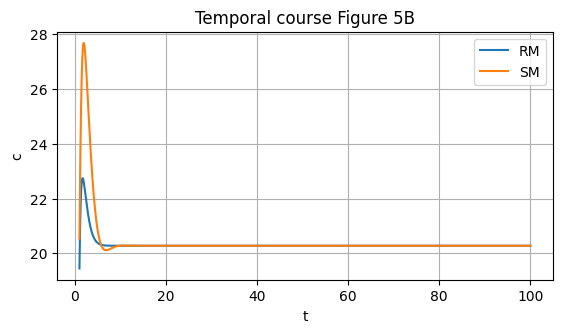

In [5]:
#Plotting
figure, axis = plt.subplots(1,sharex="col", sharey="row") 
axis.plot(t[1000:], xR[1000:,4],label='RM')
axis.plot(t[1000:], xS[1000:,4],label='SM') 
axis.set_title("Temporal course Figure 5B")  
axis.set_xlabel('t')
axis.set_ylabel('c)
axis.set_box_aspect(1/2)
axis.legend(loc='upper right')
axis.grid()
plt.show() 

### The code to integrate the model in Eqs.14, with a discrete delay kernel, corresponding to Fig. 5C, Fig. 6, and Fig. 7 is presented in a separate notebook (Figure5C_notebook).